# ISLR Q3

### (a)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

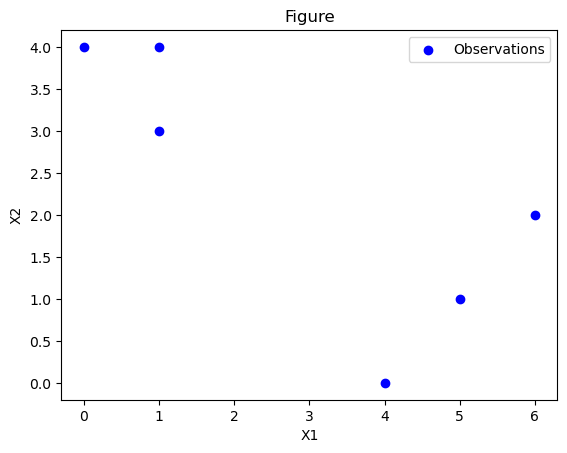

In [6]:
data_points = [(1, 4), (1, 3), (0, 4), (5, 1), (6, 2), (4, 0)]

x_values, y_values = zip(*data_points)

plt.scatter(x_values, y_values, color='blue', marker='o', label='Observations')
plt.title('Figure')
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend()
plt.show()

### (b, c, d, e, f)

In [13]:
X = np.array(data_points)

def initial(k, X):
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]

    return centroids

In [14]:
def Eu_distance(q1, q2):
    return np.sqrt(np.sum((q1-q2)**2))

def cen_distance(cen, X):
    k = len(cen)
    clusters = {i: [] for i in range(k)}

    for point in X:
        distance = [Eu_distance(point, c) for c in cen]
        closest = np.argmin(distance)

        clusters[closest].append(point)

    return clusters

def new_cen(clusters):
    new = []

    for cluster in clusters.values():
        if len(cluster) > 0:
            cen = np.mean(cluster, axis=0)
            new.append(cen)
        else:
            cen.append(np.nan)

    return np.array(new)

In [17]:
k = 2
cen = initial(k, X)
iteration = 100

for i in range(iteration):
    clusters = cen_distance(cen, X)
    cen1 = new_cen(clusters)

    if np.sum(np.abs(cen - cen1)) < 0.1:
        break

    cen = cen1

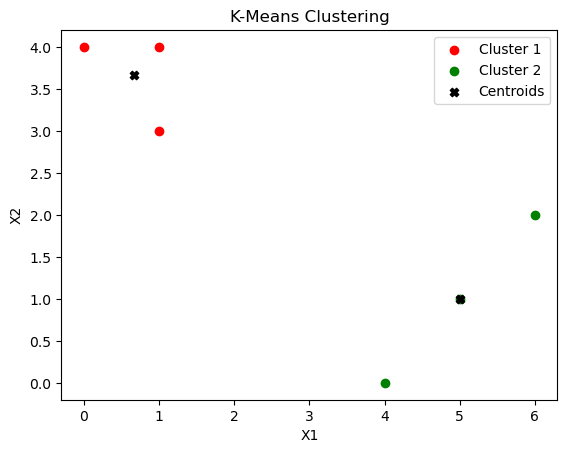

In [18]:
colors = ['r', 'g']
for i, cluster_points in clusters.items():
    cluster_points = np.array(cluster_points)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i + 1}')

plt.scatter(cen[:, 0], cen[:, 1], marker='X', color='black', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# ESL Q1

$$\sum_{l=1}^{p}(z_{il}-z_{i^{'}l})^2= \sum_{l=1}^{p}[x_{il}(\frac{w_l}{ {\textstyle \sum_{l=1}^{p}w_l} } )^{1/2}-x_{i^{'}l}(\frac{w_l}{ {\textstyle \sum_{l=1}^{p}w_l} } )^{1/2}]^2=\frac{ {\textstyle \sum_{l=1}^{p}}w_l(x_{il}-x_{i^{'}l})^2 }{ {\textstyle \sum_{l=1}^{p}w_l} } $$